In [1]:
# Importando as bibliotecas necessárias 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# Carregando o banco de dados
df = pd.read_excel('data/data-lampadas.xlsx', header=0)
print(df.shape) # mostra as dimensões do banco de dados
df.head() # mostra as 5 primeiras linhas do banco de dados

(40, 2)


,A,B
0,684,819
1,831,907
2,859,952
3,893,994
4,922,1016


In [3]:
df.info() # mostra algumas informações básicas do banco de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       40 non-null     int64
 1   B       40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


In [4]:
df.describe() # mostra algumas estatísticas do banco de dados

,A,B
count,40.000000,40.000000
mean,909.650000,1018.350000
std,94.305165,96.901364
min,684.000000,819.000000
25%,857.250000,949.750000
50%,916.500000,1015.500000
75%,971.250000,1085.500000
max,1093.000000,1230.000000


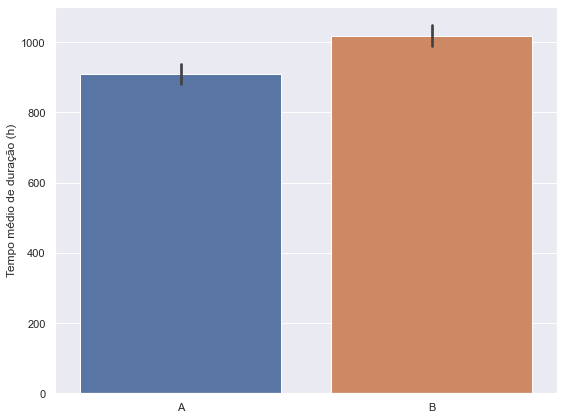

In [5]:
# Plota um gráfico de coluna com as médias e desvios padrão de A e B 
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=df)
plt.ylabel('Tempo médio de duração (h)')
plt.tight_layout()

plt.savefig('figuras/tempo_medio.png')
plt.show()

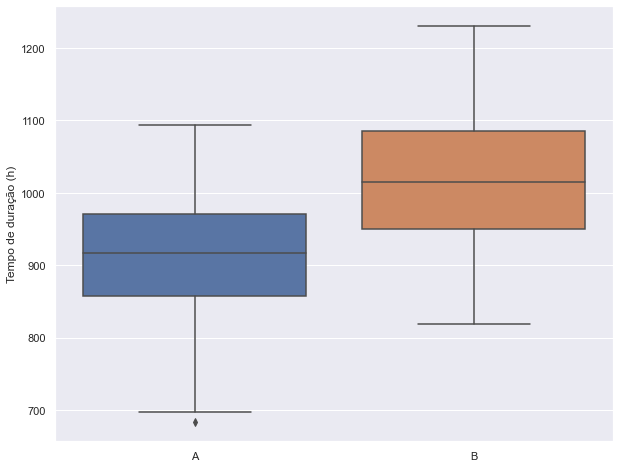

In [6]:
# Plota o boxplot dos dados

fig, ax = plt.subplots(figsize=(10,8))

sns.boxplot(data=df)

plt.ylabel('Tempo de duração (h)')  

plt.savefig('figuras/boxplot.png')

plt.show()

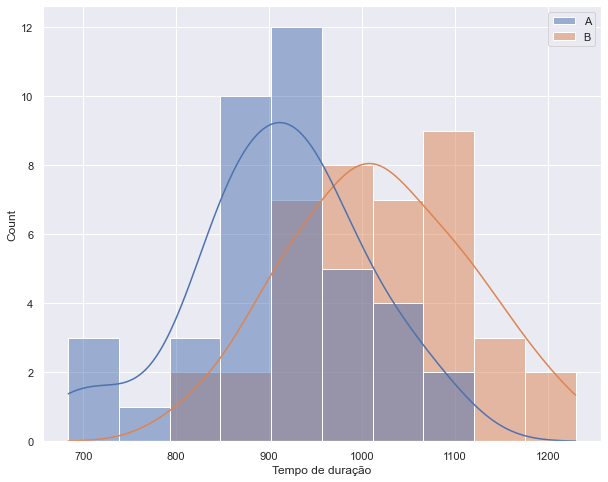

In [7]:
# Plota o histograma dos dados
fig, ax = plt.subplots(figsize=(10,8))

sns.histplot(df, kde=True)

ax.set_xlabel('Tempo de duração')

plt.savefig('figuras/hist.png')
plt.show()

## Computando CI usando Bootstrapping

Bootstrapping é um teste / métrica que usa amostragem aleatória com substituição. Ele fornece a medida de precisão (tendência, variância, intervalos de confiança, erro de previsão, etc.) para estimativas de amostra. Ele permite estimar a distribuição amostral para a maioria das estatísticas usando métodos de amostragem aleatória. Também pode ser usado para construir testes de hipóteses

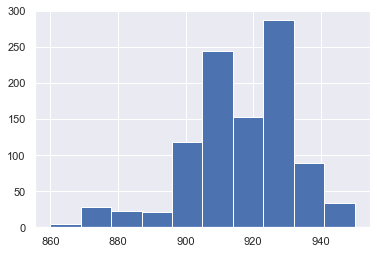


95.0 confidence interval 875.9250000000001 and 941.0


In [13]:
import pandas 
import numpy 
from sklearn.utils import resample 
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt 
x = df['A']
n_iterations = 1000
n_size = int(len(x)) 
medians = list() 
for i in range(n_iterations): 
   s = resample(x, n_samples=n_size); 
   m = numpy.median(s); 
   medians.append(m) 
plt.hist(medians) 
plt.show() 
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  numpy.percentile(medians, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  numpy.percentile(medians, p) 
  
print(f"\n{alpha*100} confidence interval {lower} and {upper}")

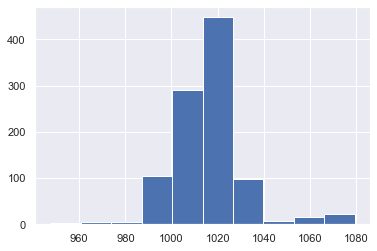


95.0 confidence interval 990.0 and 1055.55


In [12]:
import pandas 
import numpy 
from sklearn.utils import resample 
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt 
x = df['B']
n_iterations = 1000
n_size = int(len(x)) 
medians = list() 
for i in range(n_iterations): 
   s = resample(x, n_samples=n_size); 
   m = numpy.median(s); 
   medians.append(m) 
plt.hist(medians) 
plt.show() 
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  numpy.percentile(medians, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  numpy.percentile(medians, p) 
  
print(f"\n{alpha*100} confidence interval {lower} and {upper}")

In [21]:
#calcular a matriz média                                               
media = df["B"].mean(axis=0)                                             
print('media:{}'.format(media))                                            

desvio_padrao = df["B"].std(axis=0)                                          
conf_int = scipy.stats.norm.interval(0.95, loc=media, scale=desvio_padrao) 
print("intervalo de confiança: ")
print(conf_int)

media:1018.35
intervalo de confiança: 
(828.4268163664804, 1208.2731836335197)


In [16]:
import scipy.stats